In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


import astropy.io.fits as fits
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from astropy import units
from astropy import constants as cn

import corner

In [2]:
import mcclusters.generate_mock as mock

from mcclusters.initial_values import test

for v in test():
    mock.model.__dict__[ v.name ].itemset( v.item() )

mock.model.update()

Initialising models
Initialising observables
Initialising clustersmc
dz: 0.04744448256384348 kpc	px: 15.873015873015873 kpc


In [3]:
def gen( par ):
    for p in tofit:
        mock.model.__dict__[ p ].itemset( par[ tofit.index(p) ] )

    mock.model.update()
    return mock.get_observables( mock.model, sidesl=False, )

In [6]:
tofit = [ 'r200', 's', 'q', 'c', 'phi', 'psi', 'theta' ]


tpar = mock.model.variables.copy()
names = [ v.name for v in  tpar  ]


N = 100
err_rel = 0.05


fitted = [ mock.model.__dict__[v] for v in tofit ]  
pos0, pmin, pmax = np.array([ ( tpar[names.index(p)], *tpar[names.index(p)].prior.interval(1))
                             for p in tofit ]).T
err = np.abs( err_rel * pos0 )
a, b = ( np.array( ( pmin, pmax ) ) - pos0 ) / err

sample = scipy.stats.truncnorm.rvs( a, b, pos0, err, size=( N, len(tofit) ) )

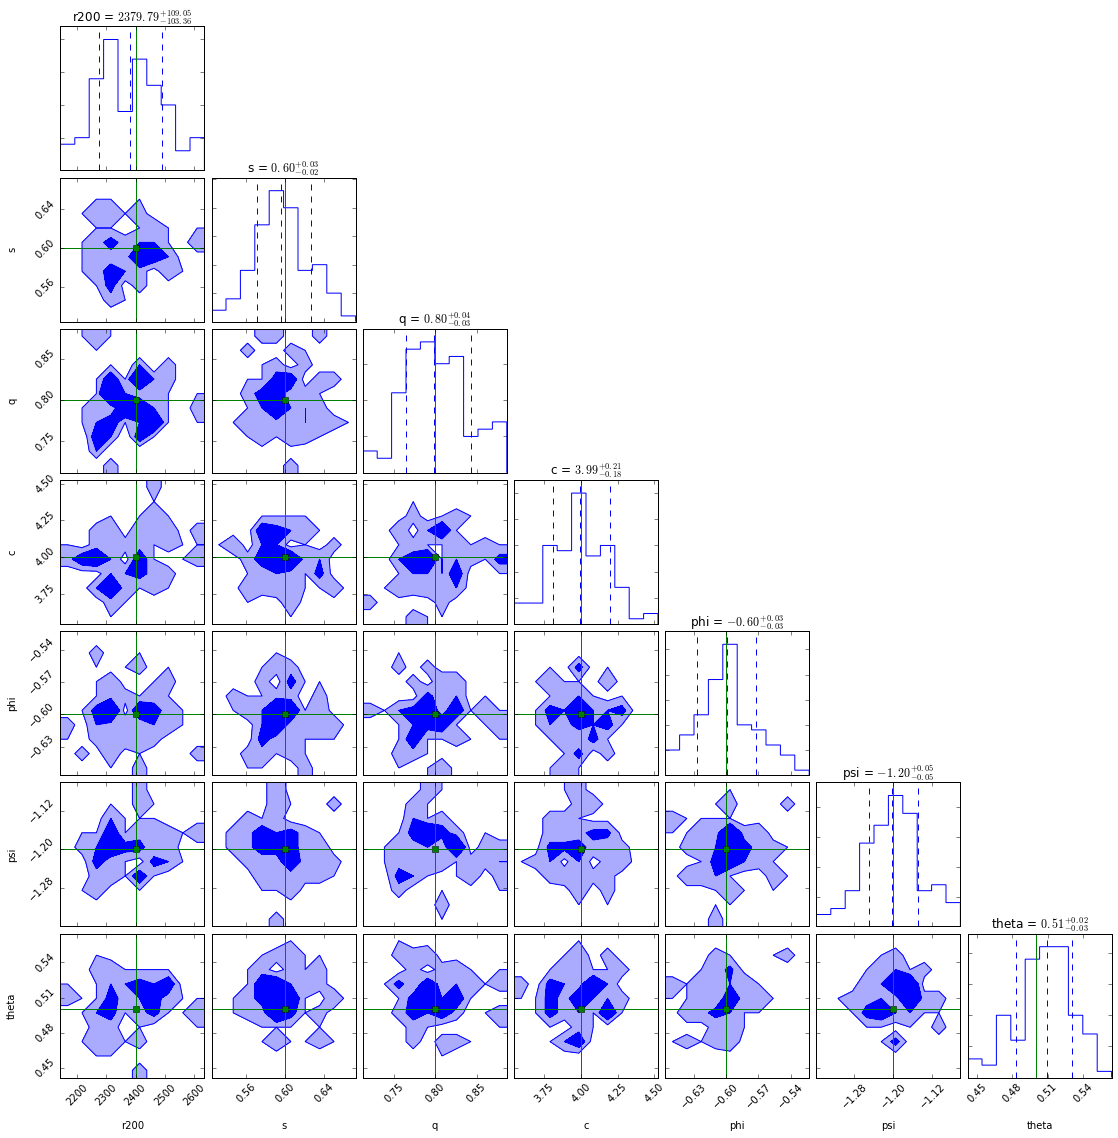

In [8]:
plt.close('all')

levels = 1 - np.exp( - np.array( [ 1, 2 ] )**2 / 2 )

fig = corner.corner( sample[:,:], labels=tofit[:], truths=pos0[:], bins=10,
                    quantiles=[0.16,0.5,0.84], levels=levels, smooth=0.,
                    plot_datapoints=False, plot_density=False, fill_contours=True,
                    show_titles=True, color='b', truth_color='g' )
